In [1]:
import pandas as pd
df = pd.read_csv('x_y_full.csv')

In [2]:
y=df[['Churn_Value']]
x=df[['Payment_Method_Bank transfer', 'Payment_Method_Credit card',
       'Payment_Method_Electronic_check', 'Payment_Method_Mailed check',
       'Contract_Month_to_month', 'Contract_One_year', 'Contract_Two_year',
       'Streaming_Movies_No', 'Streaming_Movies_No_internet_service',
       'Streaming_Movies_Yes', 'Streaming_TV_No',
       'Streaming_TV_No internet service', 'Streaming_TV_Yes',
       'Tech_Support_No', 'Tech_Support_No_internet_service',
       'Tech_Support_Yes', 'Device_Protection_No',
       'Device_Protection_No_internet_service', 'Device_Protection_Yes',
       'Online_Backup_No', 'Online_Backup_No_internet service',
       'Online_Backup_Yes', 'Online_Security_No',
       'Online_Security_No_internet_service', 'Online_Security_Yes',
       'Internet_Service_DSL', 'Internet_Service_Fiber_optic',
       'Internet_Service_No', 'Multiple_Lines_No',
       'Multiple_Lines_No_phone_service', 'Multiple_Lines_Yes',
       'Gender_Female', 'Gender_Male', 'Senior_Citizen_No',
       'Senior_Citizen_Yes', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'Phone_Service_No', 'Phone_Service_Yes',
       'Paperless_Billing_No', 'Paperless_Billing_Yes', 'Tenure_Months',
       'Monthly_Charges']]

In [113]:
df['Churn_Value'].value_counts()

0    5174
1    1869
Name: Churn_Value, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

#split data into training and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Split training set into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [4]:
X_train.shape

(4507, 45)

In [5]:
X_test.shape

(1409, 45)

In [7]:
from sklearn.preprocessing import StandardScaler
X_train_feature_selection=X_train.copy()
scaler = StandardScaler()
scaler.fit(X_train_feature_selection[['Tenure_Months', 'Monthly_Charges']])
X_train_feature_selection[['Tenure_Months', 'Monthly_Charges']] = scaler.transform(X_train_feature_selection[['Tenure_Months', 'Monthly_Charges']])


In [15]:
X_val_feature_selection=X_val.copy()
scaler = StandardScaler()
scaler.fit(X_val_feature_selection[['Tenure_Months', 'Monthly_Charges']])
X_val_feature_selection[['Tenure_Months', 'Monthly_Charges']] = scaler.transform(X_val_feature_selection[['Tenure_Months', 'Monthly_Charges']])


In [16]:
X_test_feature_selection=X_test.copy()
scaler = StandardScaler()
scaler.fit(X_test_feature_selection[['Tenure_Months', 'Monthly_Charges']])
X_test_feature_selection[['Tenure_Months', 'Monthly_Charges']] = scaler.transform(X_test_feature_selection[['Tenure_Months', 'Monthly_Charges']])


In [8]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression

lasso=LogisticRegression(penalty='l2',solver='liblinear')
lasso.fit(X_train_feature_selection,y_train)

C:\Users\HP\anaconda3\envs\Work\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [9]:
lasso.coef_

array([[-1.60423230e-01, -2.56040632e-01,  1.59668553e-01,
        -6.96910684e-02,  4.99780412e-01, -1.53924791e-01,
        -6.72341998e-01, -1.37452427e-01, -1.79282273e-01,
        -9.75167740e-03, -1.77586354e-01, -1.79282273e-01,
         3.03822494e-02,  1.12156811e-01, -1.79282273e-01,
        -2.59360916e-01, -8.56861842e-02, -1.79282273e-01,
        -6.15179205e-02,  3.19251733e-04, -1.79282273e-01,
        -1.47523356e-01,  1.38823893e-01, -1.79282273e-01,
        -2.86027998e-01, -3.73481985e-01,  2.26277881e-01,
        -1.79282273e-01, -3.34908532e-01, -5.22431467e-03,
         1.36464688e-02, -1.49123735e-01, -1.77362642e-01,
        -2.23504739e-01, -1.02981638e-01, -2.99899307e-01,
        -2.65870707e-02,  5.47539789e-01, -8.74026166e-01,
        -5.22431467e-03, -3.21262063e-01, -3.79825305e-01,
         5.33389271e-02, -9.04551386e-01,  2.37110993e-01]])

In [46]:
#X variables for SVM(scaled)
X_train_scaled=X_train_feature_selection[['Payment_Method_Electronic_check','Contract_Month_to_month','Streaming_TV_Yes','Tech_Support_No','Online_Backup_No',
'Online_Security_No','Internet_Service_Fiber_optic','Multiple_Lines_Yes','Dependents_No','Paperless_Billing_Yes',
                          'Monthly_Charges']]

In [13]:
X_train_DT=X_train[['Payment_Method_Electronic_check','Contract_Month_to_month','Streaming_TV_Yes','Tech_Support_No','Online_Backup_No',
'Online_Security_No','Internet_Service_Fiber_optic','Multiple_Lines_Yes','Dependents_No','Paperless_Billing_Yes',
                          'Monthly_Charges']]

In [17]:
X_val_scaled=X_val_feature_selection[['Payment_Method_Electronic_check','Contract_Month_to_month','Streaming_TV_Yes','Tech_Support_No','Online_Backup_No',
'Online_Security_No','Internet_Service_Fiber_optic','Multiple_Lines_Yes','Dependents_No','Paperless_Billing_Yes',
                          'Monthly_Charges']]

In [18]:
X_val_DT=X_val[['Payment_Method_Electronic_check','Contract_Month_to_month','Streaming_TV_Yes','Tech_Support_No','Online_Backup_No',
'Online_Security_No','Internet_Service_Fiber_optic','Multiple_Lines_Yes','Dependents_No','Paperless_Billing_Yes',
                          'Monthly_Charges']]

In [19]:
X_test_scaled=X_test_feature_selection[['Payment_Method_Electronic_check','Contract_Month_to_month','Streaming_TV_Yes','Tech_Support_No','Online_Backup_No',
'Online_Security_No','Internet_Service_Fiber_optic','Multiple_Lines_Yes','Dependents_No','Paperless_Billing_Yes',
                          'Monthly_Charges']]

In [20]:
X_test_DT=X_test[['Payment_Method_Electronic_check','Contract_Month_to_month','Streaming_TV_Yes','Tech_Support_No','Online_Backup_No',
'Online_Security_No','Internet_Service_Fiber_optic','Multiple_Lines_Yes','Dependents_No','Paperless_Billing_Yes',
                          'Monthly_Charges']]

In [71]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
x_resampled_train_dt,y_resampled_train=ros.fit_resample(X_train_DT,y_train)

In [72]:
#oversampling scaled
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
x_resampled_train_scaled,y_train_scaled=ros.fit_resample(X_train_scaled,y_train)

In [74]:
#oversampling on training set
x_resampled_train_scaled

,Payment_Method_Electronic_check,Contract_Month_to_month,Streaming_TV_Yes,Tech_Support_No,Online_Backup_No,Online_Security_No,Internet_Service_Fiber_optic,Multiple_Lines_Yes,Dependents_No,Paperless_Billing_Yes,Monthly_Charges
0,1,1,1,1,1,1,1,0,1,1,0.946231
1,0,1,0,0,1,1,1,1,1,1,0.479980
2,1,1,1,1,0,1,1,0,1,1,0.635950
3,0,0,1,0,0,0,1,1,1,1,1.634823
4,0,0,1,0,0,0,0,0,1,1,-0.032730
...,...,...,...,...,...,...,...,...,...,...,...
6635,1,1,1,1,0,1,1,1,1,1,1.004305
6636,1,0,1,0,1,1,1,1,1,1,1.336156
6637,1,1,0,1,1,1,0,0,1,1,-0.971869
6638,0,1,1,1,0,0,0,0,1,1,-0.192019


In [24]:
#hyperparameter tunining on training set
#decision tree
from sklearn.model_selection import GridSearchCV
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_resampled_train_dt, y_resampled_train)
grid_vals = {'max_depth': [3,4,5,6,7,8], 'max_leaf_nodes': [2,3,4,5,6]}
grid_DT = GridSearchCV(estimator=clf, param_grid=grid_vals, scoring='accuracy', 
                        )
DT_fit=grid_DT.fit(x_resampled_train_dt,y_resampled_train)
DT_fit.best_score_

0.7412650602409638

In [25]:
best_params = DT_fit.best_params_
best_clf = tree.DecisionTreeClassifier(max_depth=best_params['max_depth'], 
                                       max_leaf_nodes=best_params['max_leaf_nodes'])


best_clf.fit(x_resampled_train_dt, y_resampled_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=6)

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Gini index
clf_gini = DecisionTreeClassifier(criterion='gini')
grid_vals = {'max_depth': [3, 4, 5, 6, 7, 8], 'max_leaf_nodes': [2, 3, 4, 5, 6]}
grid_gini = GridSearchCV(estimator=clf_gini, param_grid=grid_vals, scoring='accuracy')
grid_gini.fit(x_resampled_train_dt, y_resampled_train)

#Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
grid_entropy = GridSearchCV(estimator=clf_entropy, param_grid=grid_vals, scoring='accuracy')
grid_entropy.fit(x_resampled_train_dt, y_resampled_train)


gini_best_score = grid_gini.best_score_
entropy_best_score = grid_entropy.best_score_
#accuracy using gini vs entropy
print("Gini index:", gini_best_score)
print("Entropy:", entropy_best_score)

Gini index best score: 0.7412650602409638
Entropy best score: 0.7340361445783132


In [27]:
y_pred_dt = best_clf.predict(X_val_DT)


from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_val, y_pred_dt)


print("Accuracy on validation set:", accuracy)

Accuracy on validation set: 0.7444543034605147


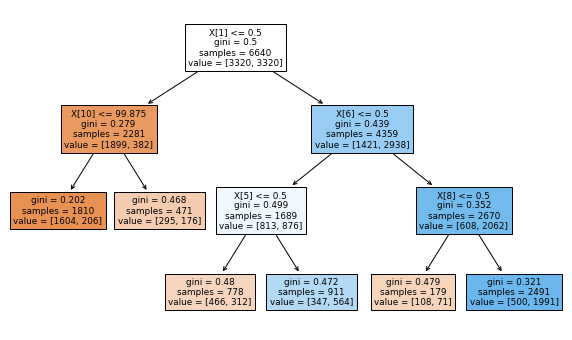

In [87]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
tree.plot_tree(best_clf, filled=True)
plt.savefig('decision_tree.png')
plt.show()

In [86]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred_dt)

array([[631, 214],
       [ 74, 208]], dtype=int64)

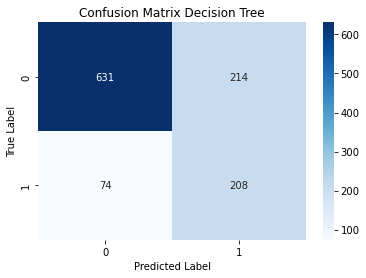

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_dt)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Customize the plot
plt.title('Confusion Matrix Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()



In [32]:
#f1 score
from sklearn.metrics import f1_score
print(f1_score(y_val, y_pred_dt,average=None))

[0.81419355 0.59090909]


In [33]:
#roc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred_dt)

0.7421671073062235

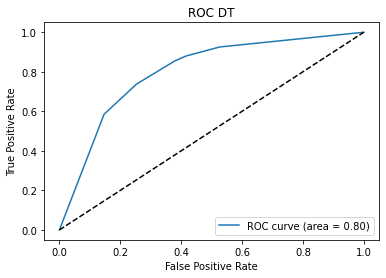

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve

# predicted probabilities for the positive class
y_preddt_prob = best_clf.predict_proba(X_val_DT)[:, 1]

# false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_val, y_preddt_prob)

# AUC-ROC score
auc = roc_auc_score(y_val, y_preddt_prob)

#ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC DT')
plt.legend(loc='lower right')
plt.savefig('roc_DT.png')
plt.show()


In [1]:
best_clf.feature_importances_[6]

NameError: name 'best_clf' is not defined

In [98]:
x_resampled_train_dt

,Payment_Method_Electronic_check,Contract_Month_to_month,Streaming_TV_Yes,Tech_Support_No,Online_Backup_No,Online_Security_No,Internet_Service_Fiber_optic,Multiple_Lines_Yes,Dependents_No,Paperless_Billing_Yes,Monthly_Charges
0,1,1,1,1,1,1,1,0,1,1,92.90
1,0,1,0,0,1,1,1,1,1,1,78.85
2,1,1,1,1,0,1,1,0,1,1,83.55
3,0,0,1,0,0,0,1,1,1,1,113.65
4,0,0,1,0,0,0,0,0,1,1,63.40
...,...,...,...,...,...,...,...,...,...,...,...
6635,1,1,1,1,0,1,1,1,1,1,94.65
6636,1,0,1,0,1,1,1,1,1,1,104.65
6637,1,1,0,1,1,1,0,0,1,1,35.10
6638,0,1,1,1,0,0,0,0,1,1,58.60


In [ ]:
#svm
from sklearn import svm
lin_clf = svm.LinearSVC()
lin_clf=lin_clf.fit(x_resampled_train_scaled, y_resampled_train_scaled)

grid_vals_svm = {'C': [0.001,0.1,1,5,10,20,50,100]}
grid_svm = GridSearchCV(estimator=lin_clf, param_grid=grid_vals_svm, scoring='accuracy', 
                        )

SVM_fit=grid_svm.fit(x_resampled_train_scaled,y_resampled_train_scaled)
SVM_fit.best_score_
#accuracy of highest hyperparameter

In [77]:
SVM_fit.best_params_

{'C': 0.1}

In [78]:
best_clf_svm = svm.LinearSVC(C=0.1)

In [79]:

best_clf_svm.fit(x_resampled_train_scaled, y_resampled_train_scaled)

C:\Users\HP\anaconda3\envs\Work\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=0.1)

In [80]:
pred_SVM=best_clf_svm.predict(X_val_scaled)

In [81]:
#confusion matrix
confusion_matrix(y_val, pred_SVM)

array([[622, 223],
       [ 65, 217]], dtype=int64)

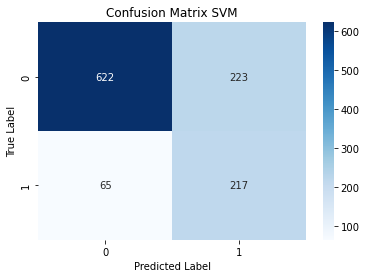

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_val, pred_SVM)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Customize the plot
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [82]:
#accuracy and f1 score
print(accuracy_score(y_val, pred_SVM))
print(f1_score(y_val, pred_SVM ,average=None))

0.7444543034605147
[0.81201044 0.60110803]


In [83]:
#roc_auc_score
roc_auc_score(y_val, pred_SVM)

0.7527991103277519

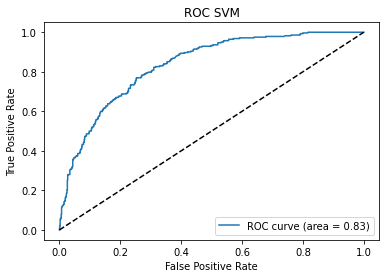

In [89]:
y_pred_scores = best_clf_svm.decision_function(X_val_scaled)

# Compute false positive rate, true positive rate, and thresholds
fpr_s, tpr_s, thresholds_s = roc_curve(y_val, y_pred_scores)

#AUC-ROC score
auc_svm = roc_auc_score(y_val, y_pred_scores)

# Plot ROC curve
plt.plot(fpr_s, tpr_s, label='ROC curve (area = %0.2f)' % auc_svm)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC SVM')
plt.legend(loc='lower right')
plt.savefig('roc_svm.png')
plt.show()

In [75]:
x_resampled_train_scaled.to_csv('X_train1_scaled.csv', index=False)
x_resampled_train_dt.to_csv('X_train_DT.csv', index=False)

In [48]:
X_val_scaled.to_csv('X_val_scaled.csv', index=False)
X_val_DT.to_csv('X_val_DT.csv', index=False)

In [49]:
X_test_scaled.to_csv('X_test_scaled.csv', index=False)
X_test_DT.to_csv('X_test_DT.csv', index=False)

In [57]:
y_resampled_train.to_csv('y_train_ml_stat.csv', index=False)

y_val.to_csv('y_val.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [101]:
best_clf_svm.coef_

array([[ 0.17957552,  0.64293418,  0.09042284,  0.13860198,  0.1043714 ,
         0.21169774,  0.28899568, -0.00892779,  0.50193586,  0.131983  ,
        -0.05186794]])

In [104]:
x_resampled_train_scaled

,Payment_Method_Electronic_check,Contract_Month_to_month,Streaming_TV_Yes,Tech_Support_No,Online_Backup_No,Online_Security_No,Internet_Service_Fiber_optic,Multiple_Lines_Yes,Dependents_No,Paperless_Billing_Yes,Monthly_Charges
0,1,1,1,1,1,1,1,0,1,1,0.946231
1,0,1,0,0,1,1,1,1,1,1,0.479980
2,1,1,1,1,0,1,1,0,1,1,0.635950
3,0,0,1,0,0,0,1,1,1,1,1.634823
4,0,0,1,0,0,0,0,0,1,1,-0.032730
...,...,...,...,...,...,...,...,...,...,...,...
6635,1,1,1,1,0,1,1,1,1,1,1.004305
6636,1,0,1,0,1,1,1,1,1,1,1.336156
6637,1,1,0,1,1,1,0,0,1,1,-0.971869
6638,0,1,1,1,0,0,0,0,1,1,-0.192019
